In [6]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from  sklearn.metrics import r2_score

Los siguientes datos fueron obtenidos para Pyrodictium occultum a 98 °C. La corrida 1 se llevó a cabo en ausencia de extracto de levadura y la corrida 2 con extracto de levadura.
Las dos corridas inicialmente contienen N2S. El vol % del producto H2S se reporta en función del tiempo.

In [12]:
#Corrida 1
t1=np.asarray([0,10,15,20,30,40,50,60,70])
#Densidad de celulas (celulas/mL)*10^-4
X1=np.asarray([2.7,2.8,15,70,400,600,775,600,525])
#%H2S
pv1=np.asarray([0.5,0.8,1,1.2,2,4.7,7.5,8,8.2])
#-----------------------------------------------------------
#Corrida 2
t2=np.asarray([0,5,10,15,20,30,40,50])
#Densidad de celulas (celulas/mL)*10^-4
X2=np.asarray([2.7,7,11,80,250,350,350,250])
#%H2S
pv2=np.asarray([0.1,0.7,0.7,0.8,1.2,4.3,7.5,11])
k=0
#Corrida 1
miu_stad1=[]
for k in list(range(0,len(X1))):
    miu_si1=(1/np.average(X1[k:k+2]))*(((np.diff(X1[k:k+2])))/((np.diff(t1[k:k+2]))))
    miu_stad1.append(miu_si1)
print('miu_s1 =',miu_stad1) 
#Corrida 2
miu_stad2=[]
print("---------------------------------------------------------------------------------------")
for k in list(range(0,len(X2))):
    miu_si2=(1/np.average(X2[k:k+2]))*(((np.diff(X2[k:k+2])))/((np.diff(t2[k:k+2]))))
    miu_stad2.append(miu_si2)
print('miu_s2 =',miu_stad2) 

miu_s1 = [array([0.00363636]), array([0.2741573]), array([0.25882353]), array([0.14042553]), array([0.04]), array([0.02545455]), array([-0.02545455]), array([-0.01333333]), array([], dtype=float64)]
---------------------------------------------------------------------------------------
miu_s2 = [array([0.17731959]), array([0.08888889]), array([0.3032967]), array([0.20606061]), array([0.03333333]), array([0.]), array([-0.03333333]), array([], dtype=float64)]


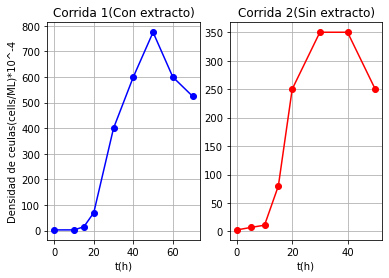

In [13]:
fig,axs=plt.subplots(1,2)
axs[0].plot(t1,X1,"bo-")
axs[0].set_xlabel("t(h)")
axs[0].set_title("Corrida 1(Con extracto)")
axs[0].grid(True)
axs[0].set_ylabel("Densidad de ceulas(cells/ML)*10^-4")
axs[1].plot(t2,X2,"ro-")
axs[1].set_xlabel("t(h)")
axs[1].set_title("Corrida 2(Sin extracto)")
axs[1].grid(True)
#axs[1].set_ylabel("Densidad de ceulas(cells/ML)*10^-4")


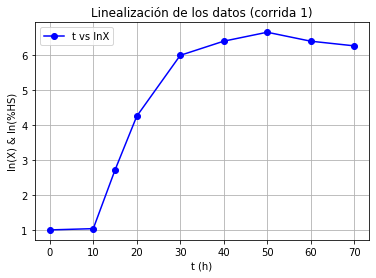

In [14]:
#b)¿Cual es la diferencia en la velocidad especifica de crecimiento en la bacteria?
#Corrida 1
plt.plot(t1,np.log(X1),"bo-",label="t vs lnX")
plt.title("Linealización de los datos (corrida 1)")
plt.xlabel("t (h)")
plt.ylabel("ln(X) & ln(%HS)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

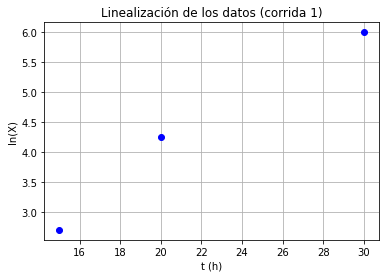

Los coeficientes del polinomio son : [ 0.21252324 -0.28866684]
R^2 = 0.9763102238010198


In [15]:
#Corrida 1
plt.plot(t1[2:5],np.log(X1)[2:5],"bo")
plt.title("Linealización de los datos (corrida 1)")
plt.xlabel("t (h)")
plt.ylabel("ln(X)")
plt.grid(True)
plt.show()
Regtl1=np.polyfit(t1[2:5],np.log(X1)[2:5],1) #Ajuste lineal
model1=np.poly1d(Regtl1)
print("Los coeficientes del polinomio son :",Regtl1)
R21=r2_score(np.log(X1)[2:5],model1(t1[2:5]))#Encontramos el R^2 segun los datos 
print("R^2 =",R21) 

La velocidad especifica de crecimiento para la corrida 1 es: $$\mu_1 = 0.2125 \ h^{-1} $$

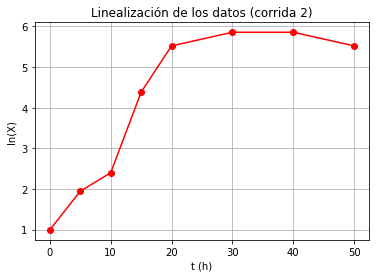

In [17]:
#Corrida 2
plt.plot(t2,np.log(X2),"ro-")
plt.title("Linealización de los datos (corrida 2)")
plt.xlabel("t (h)")
plt.ylabel("ln(X) ")
plt.grid(True)
plt.show()

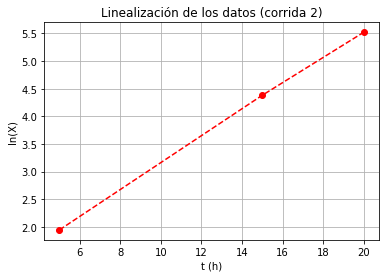

Los coeficientes del polinomio son : [0.24361165 0.4724942 ]
R^2 = 0.8835086002842384


In [18]:
#Corrida 2
t22=np.asarray([0,5,15,20,30,40,50])
#Densidad de celulas (celulas/mL)*10^-4
X22=np.asarray([2.7,7,80,250,350,350,250])

plt.plot(t22[1:4],np.log(X22)[1:4],"ro--")
plt.title("Linealización de los datos (corrida 2)")
plt.xlabel("t (h)")
plt.ylabel("ln(X)")
plt.grid(True)
plt.show()
Regtl2=np.polyfit(t2[1:4],np.log(X2)[1:4],1) #Ajuste lineal
model2=np.poly1d(Regtl2)
print("Los coeficientes del polinomio son :",Regtl2)
R22=r2_score(np.log(X2)[1:4],model2(t2[1:4]))#Encontramos el R^2 segun los datos 
print("R^2 =",R22) 
#No se debe tomar el dato atipico

La velocidad especifica de crecimiento para la corrida 2 es: $$\mu_2 = 0.2436 \ h^{-1} $$

Por tanto la diferencia sería de : $$\mu_d = 0.0311 \ h^{-1} $$

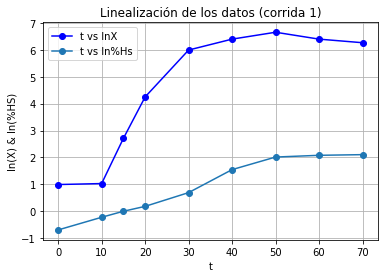

La fase estacionaria para la corrida 1 esta comprendida entre : 40-60hr debido a que aumenta y diminuye en la misma proporción, misma velocidad 


In [19]:
#c) Cual es la longitud de la fase estancionaria?
#Corrida 1
plt.plot(t1,np.log(X1),"bo-",label="t vs lnX")
plt.plot(t1,np.log(pv1),"o-",label="t vs ln%Hs")
plt.title("Linealización de los datos (corrida 1)")
plt.xlabel("t")
plt.ylabel("ln(X) & ln(%HS)")
plt.legend(loc="best")
plt.grid(True)
plt.show()
print("La fase estacionaria para la corrida 1 esta comprendida entre : 40-60hr debido a que aumenta y diminuye en la misma proporción, misma velocidad ")

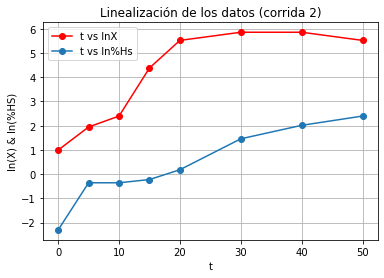

La fase estacionaria para la corrida 2 esta comprendida entre : 30-40 h


In [20]:
#c) Cual es la longitud de la fase estancionaria?
#Corrida 2
plt.plot(t2,np.log(X2),"ro-",label="t vs lnX")
plt.plot(t2,np.log(pv2),"o-",label="t vs ln%Hs")
plt.title("Linealización de los datos (corrida 2)")
plt.xlabel("t")
plt.ylabel("ln(X) & ln(%HS)")
plt.legend(loc="best")
plt.grid(True)
plt.show()
print("La fase estacionaria para la corrida 2 esta comprendida entre : 30-40 h")

In [22]:
#d)En cual fase se produce mayoritariamente el H2S
print("Se produce mayor cantidad de H2S en la fase estacionaria")

Se produce mayor cantidad de H2S en la fase estacionaria


In [ ]:
#En la corrida 2 de 0 a 20 el crecimiento es exponencial solo que hay un dato atipico
#Sacando el prom estadistico debemos revisar cuales miu son mayores y esos puntos estan en crecimiento exponencial
#cuando empiece a disminuir el valor de miu tanto que es de valor (-) se referirá a la fase de muerte